# Verificaremos si el modelo que estoy usando es el correcto

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/ProyectoNuevo/data/prueba/melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/ProyectoNuevo/data/prueba/carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [3]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")

en total tenemos: 5261 imagenes dentro de la carpeta train


In [4]:
def creacion_modelo():
    modelo=Sequential()
    modelo.add(Convolution2D(4,(3,3),input_shape=(224,224,3),activation='relu'))
    modelo.add(Convolution2D(8,(3,3),activation='relu'))
    modelo.add(MaxPooling2D(pool_size=((2,2))))
    modelo.add(Convolution2D(16,(3,3),activation='relu'))
    modelo.add(Convolution2D(32,(3,3),activation='relu'))
    modelo.add(MaxPooling2D(pool_size=((2,2))))
    modelo.add(Flatten())
    modelo.add(Dense(128,activation='relu'))
    modelo.add(Dense(100,activation='relu'))
    modelo.add(Dense(100,activation='relu'))
    modelo.add(Dense(1,activation='sigmoid'))
    return modelo

## metodos que ayudaran en el proceso de entrenamiento

In [5]:
def evaluacion(modelo,porcentaje,nombre,x_e,y_e,x_p,y_p,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break

In [6]:
def validacion(x_e,y_e,x_p,y_p,model,epocas):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    return a[1]

## creacion de modelos para cada prueba

In [7]:
from tensorflow import keras

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.0009)
modelo=creacion_modelo()
modelo.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

## validacion Cruzada

In [10]:
n=int(len(dataTr)/5)
output=[dataTr[i:i + n] for i in range(0, len(dataTr), n)]
porcion1=output[0]
porcion2=output[1]
porcion3=output[2]
porcion4=output[3]
porcion5=output[4]
porcion5.extend(output[5])
print(len(porcion1),len(porcion2),len(porcion3),len(porcion4),len(porcion5))

1052 1052 1052 1052 1053


In [11]:
x_p1,y_p1=particion(porcion1)
x_p2,y_p2=particion(porcion2)
x_p3,y_p3=particion(porcion3)
x_p4,y_p4=particion(porcion4)
x_p5,y_p5=particion(porcion5)

In [12]:
x_entre=[]
y_entre=[]
entre1=porcion4+porcion3+porcion2+porcion1
entre2=porcion5+porcion3+porcion2+porcion1
entre3=porcion5+porcion4+porcion2+porcion1
entre4=porcion5+porcion4+porcion3+porcion1
entre5=porcion5+porcion4+porcion3+porcion2

In [13]:
v_e1=[]
v_a1=[]
x_entre,y_entre=particion(entre1)
evaluacion(modelo,80,"ADAM",x_entre,y_entre,x_p5,y_p5,v_e1,v_a1)
x_entre=[]
y_entre=[]
print(v_e1)
print(v_a1)

Train on 4208 samples, validate on 1053 samples
1053/1053 [==============================] - 2s 2ms/sample - loss: 0.4962 - acc: 0.7398
Train on 4208 samples, validate on 1053 samples
1053/1053 [==============================] - 2s 2ms/sample - loss: 0.4536 - acc: 0.7702
Train on 4208 samples, validate on 1053 samples
1053/1053 [==============================] - 2s 2ms/sample - loss: 0.4435 - acc: 0.8006
==> Para el metodo ADAM se utilizo: 3 epocas para llegar a mas del 80% de acertividad
[1, 2, 3]
[73.97910952568054, 77.01804637908936, 80.05697727203369]


In [14]:
v_e2=[]
v_a2=[]
x_entre,y_entre=particion(entre2)
evaluacion(modelo,80,"ADAM",x_entre,y_entre,x_p4,y_p4,v_e2,v_a2)
x_entre=[]
y_entre=[]
print(v_e2)
print(v_a2)

Train on 4209 samples, validate on 1052 samples
1052/1052 [==============================] - 2s 2ms/sample - loss: 0.1529 - acc: 0.9610
==> Para el metodo ADAM se utilizo: 1 epocas para llegar a mas del 80% de acertividad
[1]
[96.10266089439392]


In [15]:
v_e3=[]
v_a3=[]
x_entre,y_entre=particion(entre3)
evaluacion(modelo,80,"ADAM",x_entre,y_entre,x_p3,y_p3,v_e3,v_a3)
x_entre=[]
y_entre=[]
print(v_e3)
print(v_a3)

Train on 4209 samples, validate on 1052 samples
1052/1052 [==============================] - 2s 2ms/sample - loss: 0.1102 - acc: 0.9629
==> Para el metodo ADAM se utilizo: 1 epocas para llegar a mas del 80% de acertividad
[1]
[96.2927758693695]


In [16]:
v_e4=[]
v_a4=[]
x_entre,y_entre=particion(entre4)
evaluacion(modelo,80,"ADAM",x_entre,y_entre,x_p2,y_p2,v_e4,v_a4)
x_entre=[]
y_entre=[]
print(v_e4)
print(v_a4)

Train on 4209 samples, validate on 1052 samples
1052/1052 [==============================] - 2s 2ms/sample - loss: 0.0310 - acc: 0.9943
==> Para el metodo ADAM se utilizo: 1 epocas para llegar a mas del 80% de acertividad
[1]
[99.42965507507324]


In [17]:
v_e5=[]
v_a5=[]
x_entre,y_entre=particion(entre5)
evaluacion(modelo,80,"ADAM",x_entre,y_entre,x_p1,y_p1,v_e5,v_a5)
print(v_e5)
print(v_a5)

Train on 4209 samples, validate on 1052 samples
1052/1052 [==============================] - 2s 2ms/sample - loss: 0.0106 - acc: 0.9971
==> Para el metodo ADAM se utilizo: 1 epocas para llegar a mas del 80% de acertividad
[1]
[99.71482753753662]


In [18]:
resultante=[]
resultante.append(v_a1[-1])
resultante.append(v_a2[-1])
resultante.append(v_a3[-1])
resultante.append(v_a4[-1])
resultante.append(v_a5[-1])
media =round(np.mean(resultante),1) 
desviacion_estandart = np.std(resultante)
print("valores de asertividad: "+str(v_a1[-1]),str(v_a2[-1]),str(v_a3[-1]),str(v_a4[-1]),str(v_a5[-1]))
print("se tiene que como media el valor: "+str(media)+"% de asertividad")
print("se tiene que como desviacion estandart: +/- "+str(round(desviacion_estandart,1))+"% de variacion")

valores de asertividad: 80.05697727203369 96.10266089439392 96.2927758693695 99.42965507507324 99.71482753753662
se tiene que como media el valor: 94.3% de asertividad
se tiene que como desviacion estandart: +/- 7.3% de variacion


## Graficando los resultados

In [19]:
#pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as mp

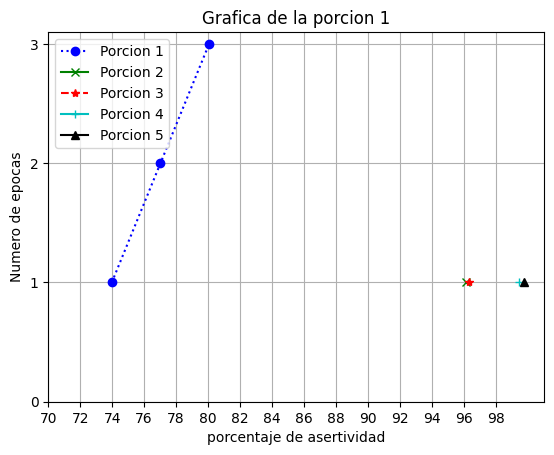

In [20]:
mp.plot(v_a1,v_e1, marker='o', linestyle=':', color='b', label = "Porcion 1")
mp.plot(v_a2,v_e2, marker='x', linestyle='-', color='g', label = "Porcion 2")
mp.plot(v_a3,v_e3, marker='*', linestyle='--', color='r', label = "Porcion 3")
mp.plot(v_a4,v_e4, marker='+', linestyle='-', color='c', label = "Porcion 4")
mp.plot(v_a5,v_e5, marker='^', linestyle='-', color='k', label = "Porcion 5")

mp.xticks(np.arange(70,100,2))
mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Grafica de la porcion 1")
mp.grid(True)
mp.show()


In [21]:
print(resultante)

[80.05697727203369, 96.10266089439392, 96.2927758693695, 99.42965507507324, 99.71482753753662]
